#**Import Libraries**

In [29]:
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubelI/master/dataset/amazon_revenue_profit.csv',parse_dates=["Quarter"],dayfirst=True)
df.head

#**Plotting The data**

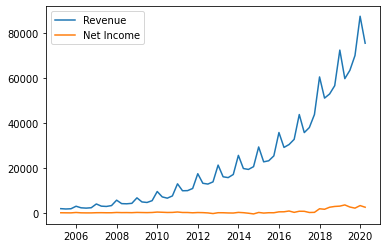

In [32]:
y=df.Revenue
z=df['Net Income']
x=df.Quarter
plt.plot(x,y)
plt.plot(x,z)
plt.legend(['Revenue','Net Income'])
plt.show()

In [27]:
fig=px.line(df,x='Quarter',y='Revenue',title='Amazon Revenue Slider')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
                      dict(count=1,label='1y',step='year',stepmode='backward'),
                      dict(count=2,label='3y',step='year',stepmode='backward'),
                      dict(count=3,label='5y',step='year',stepmode='backward'),
                      dict(count=1,label='1y',step='year',stepmode='backward'),
                      dict(step='all'),
        ])
    )
)
fig.show()

#**KPSS** : Test for Stionarity 
**Null Hypothesis** : data stationary <br>
**Alternaive Hypothesis** : data not stationary

In [33]:
from statsmodels.tsa.stattools import kpss

In [34]:
test=kpss(df['Revenue'],"ct") #“ct” : The data is stationary around a trend.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'



In [35]:
test # P-value, 0.029, is less than  = 0.05, we reject the null hypothesis 
# t 0.01 is 0.119. That is, we would reject the null hypothesis H0  in favor of the 
# alternative hypothesis HA  if the test statistic t* is greater than 0.119.

(0.170051682108309,
 0.029956931576409152,
 11,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})

#**Decomposition**

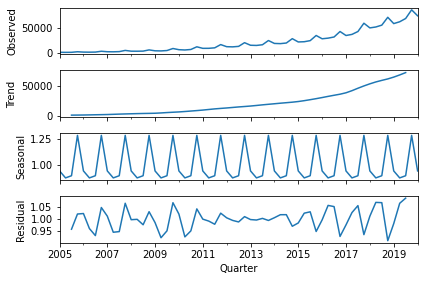

In [44]:
import statsmodels.api as sm
df.reset_index(inplace=True)
df['Quarter'] = pd.to_datetime(df['Quarter'])
df = df.set_index('Quarter')
res=sm.tsa.seasonal_decompose(df['Revenue'],
                              model="multiplicative")
#multiplicative for non stationary and seasonal increases or decreases with level of time series 
resplot=res.plot()

In [ ]:
plt.figure(figsize=(22,7))
res.trend.plot()

In [ ]:
res.observed

In [ ]:
print(res.trend)

In [ ]:
print(res.seasonal)

In [ ]:
res.resid

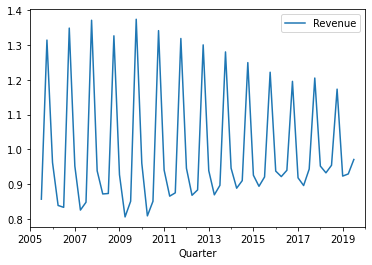

In [50]:
pd.DataFrame(res.observed/res.trend).plot()